![title](markov/def.jpg)

Предположим, что у меня есть таблица состояний на момент принития стохастической системой "Организм Владимира" утром в 9 часов. Тогда можно симулировать принятие решений по принципу цепи Маркова.

![Матрица переходов](markov/table.png)

![graph](markov/graph.png)

Из таблицы состояний видно, что все состояния имеют ненулевые вероятности перехода в другие состояния. Это предполагает, что марковская цепь может быть неприводимой, так как существует вероятность перейти из любого состояния в любое другое. Например:
Из "Сон" можно перейти в "Тренировка" с вероятностью 0.4, а также в "Учеба" и "Прием пищи" с вероятностями 0.2 и т.д.
Также в таблице не видны явные циклы с периодом больше единицы, что делает возможным апериодичность цепи. Однако, для точного утверждения о неприводимости и апериодичности требуется дополнительный анализ, которым мы еще займемся.
Если цепь неприводима и апериодична, и если каждое состояние возвратно с конечным средним временем возврата, то представленная марковская цепь является эргодической.

In [1]:
import numpy as np

states = ["Сон", "Тренировка", "Учеба", "Прием пищи"]
transitionName = [
    ["СС", "СТ", "СУ", "СП"],   # Сон -> Сон, Сон -> Тренировка, Сон -> Учеба, Сон -> Прием пищи
    ["ТС", "ТТ", "ТУ", "ТП"],   # Тренировка -> Сон, Тренировка -> Тренировка, ...
    ["УС", "УТ", "УУ", "УП"],   # Учеба -> Сон, Учеба -> Тренировка, ...
    ["ПС", "ПТ", "ПУ", "ПП"]    # Прием пищи -> Сон, Прием пищи -> Тренировка, ...
]
transitionMatrix1 = [
    [0.2, 0.4, 0.2, 0.2],  
    [0.3, 0.1, 0.4, 0.2],
    [0.4, 0.1, 0.2, 0.3],  
    [0.3, 0.2, 0.4, 0.1]  
]
transitionMatrix = [
    [0, 0.3, 0.2, 0.5],  
    [0.4, 0, 0.1, 0.5],
    [0.2, 0.6, 0, 0.2],  
    [0.3, 0.3, 0.4, 0.0]  
]

In [2]:
def activity_forecast(days, init):
    activityToday = init
    print("Начальное состояние: " + activityToday)
   
    activityList = [activityToday]
    i = 0

    prob = 1
    while i != days:
        if activityToday == "Сон":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "СС":
                prob = prob * 0.2
                activityList.append("Сон")
            elif change == "СТ":
                prob = prob * 0.4
                activityToday = "Тренировка"
                activityList.append("Тренировка")
            elif change == "СУ":
                prob = prob * 0.2
                activityToday = "Учеба"
                activityList.append("Учеба")
            else:
                prob = prob * 0.2
                activityToday = "Прием пищи"
                activityList.append("Прием пищи")
        elif activityToday == "Тренировка":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "ТТ":
                prob = prob * 0.1
                activityList.append("Тренировка")
            elif change == "ТС":
                prob = prob * 0.3
                activityToday = "Сон"
                activityList.append("Сон")
            elif change == "ТУ":
                prob = prob * 0.4
                activityToday = "Учеба"
                activityList.append("Учеба")
            else:
                prob = prob * 0.2
                activityToday = "Прием пищи"
                activityList.append("Прием пищи")
        elif activityToday == "Учеба":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "УУ":
                prob = prob * 0.2
                activityList.append("Учеба")
            elif change == "УС":
                prob = prob * 0.4
                activityToday = "Сон"
                activityList.append("Сон")
            elif change == "УТ":
                prob = prob * 0.1
                activityToday = "Тренировка"
                activityList.append("Тренировка")
            else:
                prob = prob * 0.3
                activityToday = "Прием пищи"
                activityList.append("Прием пищи")
        elif activityToday == "Прием пищи":
            change = np.random.choice(transitionName[3],replace=True,p=transitionMatrix[3])
            if change == "ПП":
                prob = prob * 0.1
                activityList.append("Прием пищи")
            elif change == "ПС":
                prob = prob * 0.3
                activityToday = "Сон"
                activityList.append("Сон")
            elif change == "ПТ":
                prob = prob * 0.2
                activityToday = "Тренировка"
                activityList.append("Тренировка")
            else:
                prob = prob * 0.4
                activityToday = "Учеба"
                activityList.append("Учеба")
        i += 1
    print("Возможные состояния: " + str(activityList))
    print("Конечное состояние через "+ str(days) + " часа: " + activityToday)
    print("Вероятность возможной последовательности состояний: " + str(prob))
    
    return(activityList)

In [3]:
# Предсказание возможного состояния через 3 часа
activity_forecast(3, 'Тренировка')
activity_forecast(3, 'Сон')

Начальное состояние: Тренировка
Возможные состояния: ['Тренировка', 'Сон', 'Прием пищи', 'Тренировка']
Конечное состояние через 3 часа: Тренировка
Вероятность возможной последовательности состояний: 0.012
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Прием пищи', 'Сон', 'Тренировка']
Конечное состояние через 3 часа: Тренировка
Вероятность возможной последовательности состояний: 0.024


['Сон', 'Прием пищи', 'Сон', 'Тренировка']

Реализовали итерационный подход, теперь займемся поиском стационарного распределения

In [4]:
def find_stationary_distribution(transition_matrix):
    n = len(transition_matrix)
    #  (P^T - I) * pi = 0
    A = np.transpose(transition_matrix) - np.eye(n)
    A = np.vstack([A, np.ones(n)])
    b = np.zeros(n + 1)
    b[-1] = 1 
    # lsm
    pi, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    return pi
    
stationary_distribution = find_stationary_distribution(transitionMatrix)
print("Стационарное распределение:", stationary_distribution)
sum = 0
for i in stationary_distribution:
    sum+=i
print(sum)

Стационарное распределение: [0.23710922 0.27527406 0.19285424 0.29476248]
0.9999999999999997


Начальное состояние: Сон
Возможные состояния: ['Сон', 'Тренировка', 'Прием пищи', 'Сон', 'Учеба', 'Прием пищи', 'Учеба', 'Тренировка', 'Прием пищи', 'Сон', 'Прием пищи', 'Тренировка', 'Прием пищи', 'Сон', 'Учеба', 'Тренировка', 'Сон', 'Прием пищи', 'Сон', 'Учеба', 'Тренировка']
Конечное состояние через 20 часа: Тренировка
Вероятность возможной последовательности состояний: 5.971968000000005e-14
Начальное состояние: Тренировка
Возможные состояния: ['Тренировка', 'Сон', 'Прием пищи', 'Тренировка', 'Прием пищи', 'Учеба', 'Тренировка', 'Прием пищи', 'Тренировка', 'Прием пищи', 'Учеба', 'Прием пищи', 'Сон', 'Тренировка', 'Сон', 'Тренировка', 'Прием пищи', 'Учеба', 'Тренировка', 'Прием пищи', 'Тренировка']
Конечное состояние через 20 часа: Тренировка
Вероятность возможной последовательности состояний: 4.2467328000000016e-13
Начальное состояние: Учеба
Возможные состояния: ['Учеба', 'Тренировка', 'Прием пищи', 'Учеба', 'Прием пищи', 'Сон', 'Тренировка', 'Сон', 'Учеба', 'Тренировка', 'Учеба', '

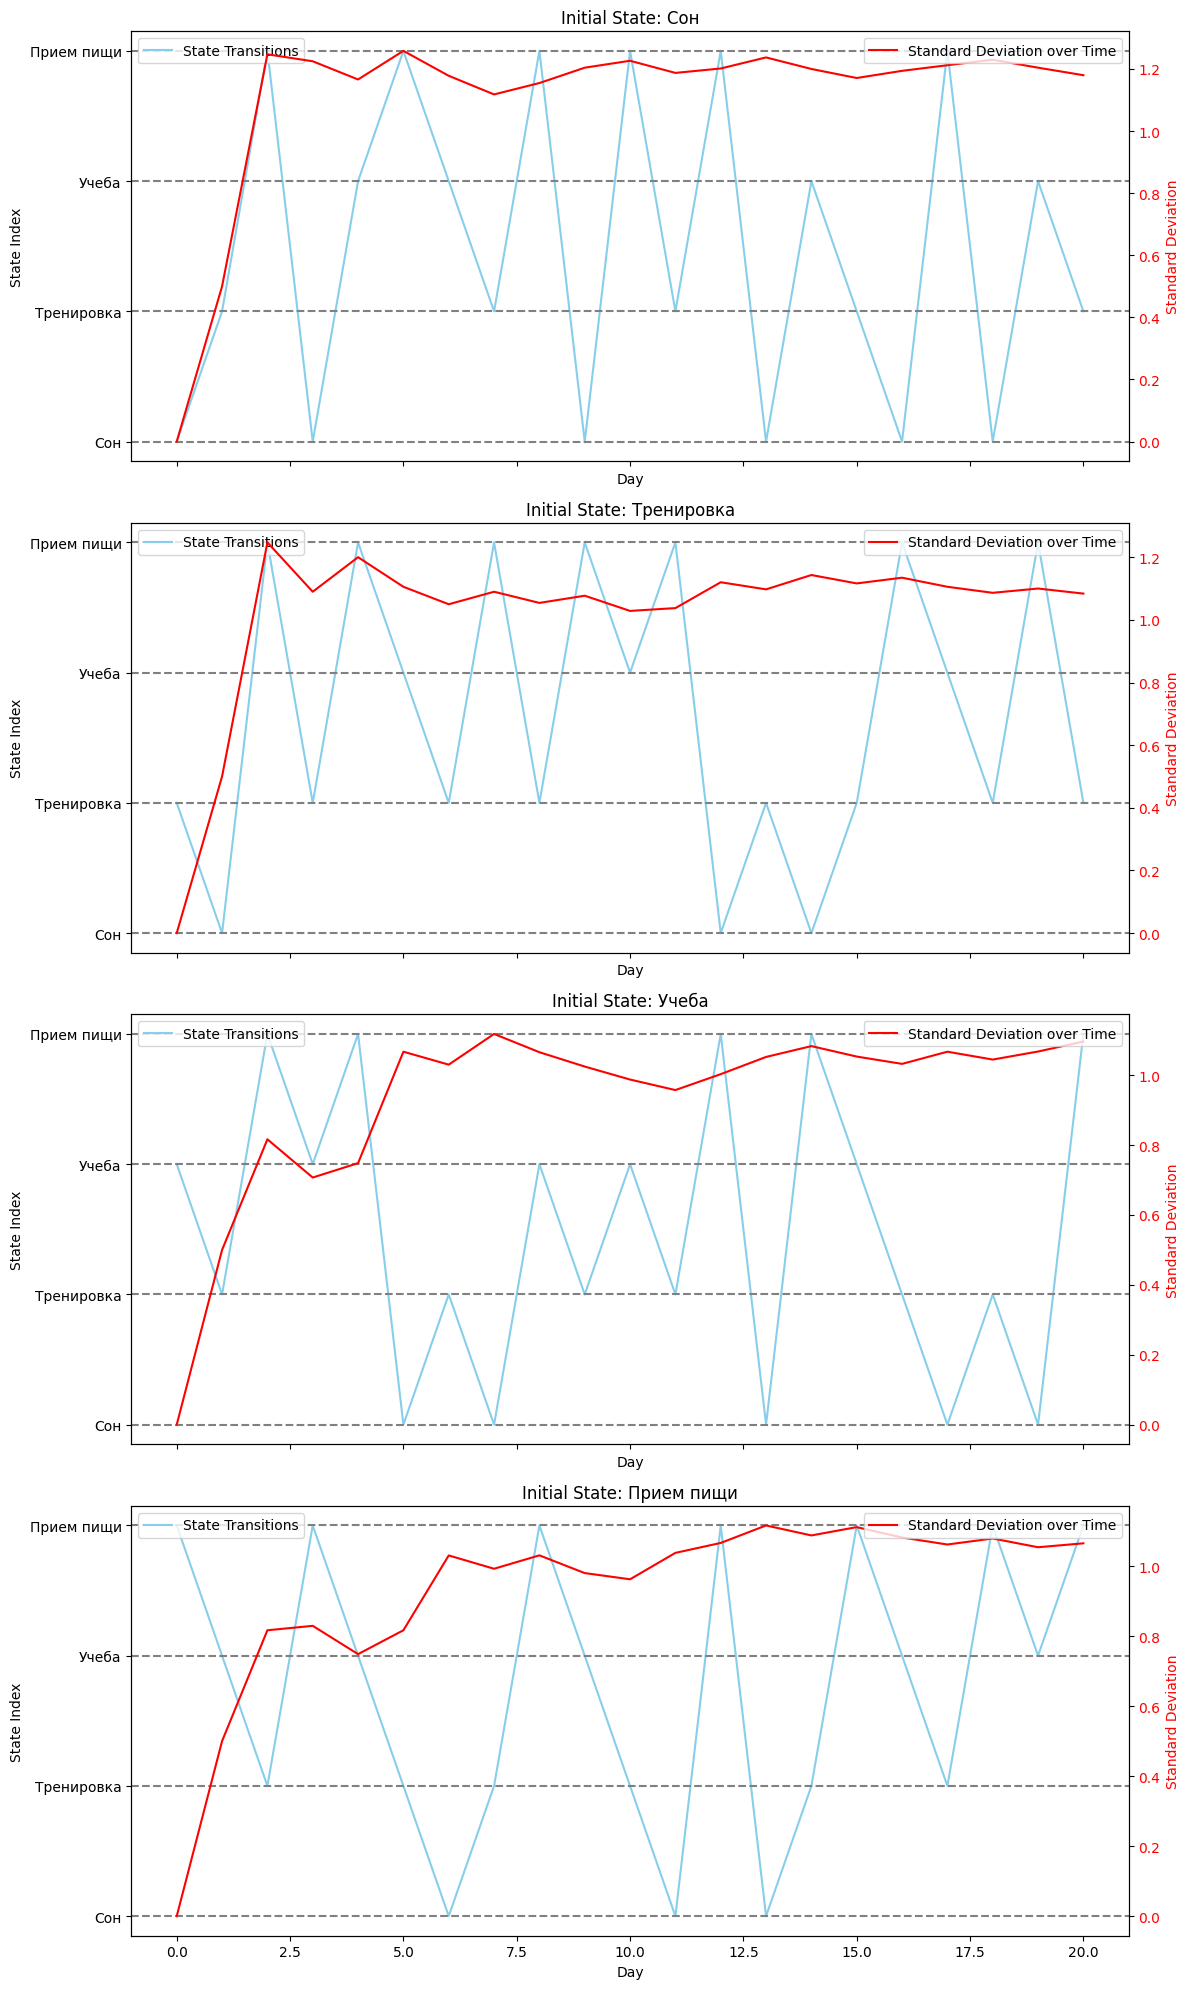

In [5]:
import matplotlib.pyplot as plt

state_to_index = {state: idx for idx, state in enumerate(states)}
hours = 20
results = {state: activity_forecast(hours, state) for state in states}

fig, axs = plt.subplots(len(states), 1, figsize=(12, 20), sharex=True)
fig.subplots_adjust(hspace=0.5)

colors = ['blue', 'green', 'red', 'purple']
state_colors = {state: colors[i] for i, state in enumerate(states)}

for i, (state, simulations) in enumerate(results.items()):
    state_indices = [state_to_index[s] for s in simulations]
    
    ax2 = axs[i].twinx()
    std_dev_over_time = [np.std(state_indices[:j+1]) for j in range(0, hours+1)]

    line, = axs[i].plot(range(0, hours+1), state_indices, label='State Transitions', color='skyblue')
    std_line, = ax2.plot(range(0, hours+1), std_dev_over_time, color='red', label='Standard Deviation over Time')
    
    axs[i].set_ylabel('State Index')
    ax2.set_ylabel('Standard Deviation', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    axs[i].set_title(f"Initial State: {state}")
    axs[i].set_xlabel('Day')
    axs[i].set_yticks(range(len(states)))
    axs[i].set_yticklabels(states)

    ax2.legend(handles=[std_line], loc='upper right')
    axs[i].legend(handles=[line], loc='upper left')
    for idx, prob in enumerate(stationary_distribution):
        axs[i].axhline(y=idx, color='grey', linestyle='--', label=f'Stationary {states[idx]}: {prob:.2f}')

plt.tight_layout()
plt.show()

In [6]:
def calculate_state_frequencies(simulations, states):
    num_simulations = len(simulations)
    state_counts = {state: 0 for state in states}
    
    # Подсчет частоты каждого состояния на последнем шаге каждой симуляции
    for simulation in simulations:
        last_state = simulation[-1]
        state_counts[last_state] += 1

    state_frequencies = {state: count / num_simulations for state, count in state_counts.items()}
    return state_frequencies

states = ["Сон", "Тренировка", "Учеба", "Прием пищи"]
results = {state: [activity_forecast(5, state) for _ in range(100000)] for state in states}
state_frequencies = {state: calculate_state_frequencies(simulations, states) for state, simulations in results.items()}

Начальное состояние: Сон
Возможные состояния: ['Сон', 'Тренировка', 'Сон', 'Прием пищи', 'Учеба', 'Тренировка']
Конечное состояние через 5 часа: Тренировка
Вероятность возможной последовательности состояний: 0.0009600000000000001
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Прием пищи', 'Учеба', 'Тренировка', 'Сон', 'Тренировка']
Конечное состояние через 5 часа: Тренировка
Вероятность возможной последовательности состояний: 0.0009600000000000003
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Прием пищи', 'Учеба', 'Тренировка', 'Сон', 'Тренировка']
Конечное состояние через 5 часа: Тренировка
Вероятность возможной последовательности состояний: 0.0009600000000000003
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Тренировка', 'Прием пищи', 'Учеба', 'Сон', 'Тренировка']
Конечное состояние через 5 часа: Тренировка
Вероятность возможной последовательности состояний: 0.005120000000000002
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Прием пищи', 'Сон', 'Учеба

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Возможные состояния: ['Учеба', 'Сон', 'Прием пищи', 'Учеба', 'Тренировка', 'Сон']
Конечное состояние через 5 часа: Сон
Вероятность возможной последовательности состояний: 0.0009600000000000002
Начальное состояние: Учеба
Возможные состояния: ['Учеба', 'Сон', 'Тренировка', 'Сон', 'Тренировка', 'Прием пищи']
Конечное состояние через 5 часа: Прием пищи
Вероятность возможной последовательности состояний: 0.0038400000000000014
Начальное состояние: Учеба
Возможные состояния: ['Учеба', 'Прием пищи', 'Учеба', 'Тренировка', 'Учеба', 'Прием пищи']
Конечное состояние через 5 часа: Прием пищи
Вероятность возможной последовательности состояний: 0.00144
Начальное состояние: Учеба
Возможные состояния: ['Учеба', 'Прием пищи', 'Тренировка', 'Прием пищи', 'Сон', 'Прием пищи']
Конечное состояние через 5 часа: Прием пищи
Вероятность возможной последовательности состояний: 0.00072
Начальное состояние: Учеба
Возможные состояния: ['Учеба', 'Тренировка', 'Сон', 'Прием пищи', 'Сон', 'Прием пищи']
Конечное состо

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Возможные состояния: ['Прием пищи', 'Тренировка', 'Прием пищи', 'Учеба', 'Прием пищи', 'Тренировка']
Конечное состояние через 5 часа: Тренировка
Вероятность возможной последовательности состояний: 0.0009600000000000003
Начальное состояние: Прием пищи
Возможные состояния: ['Прием пищи', 'Учеба', 'Тренировка', 'Учеба', 'Сон', 'Прием пищи']
Конечное состояние через 5 часа: Прием пищи
Вероятность возможной последовательности состояний: 0.0012800000000000005
Начальное состояние: Прием пищи
Возможные состояния: ['Прием пищи', 'Сон', 'Тренировка', 'Прием пищи', 'Тренировка', 'Сон']
Конечное состояние через 5 часа: Сон
Вероятность возможной последовательности состояний: 0.00144
Начальное состояние: Прием пищи
Возможные состояния: ['Прием пищи', 'Тренировка', 'Сон', 'Учеба', 'Тренировка', 'Прием пищи']
Конечное состояние через 5 часа: Прием пищи
Вероятность возможной последовательности состояний: 0.00024000000000000003
Начальное состояние: Прием пищи
Возможные состояния: ['Прием пищи', 'Учеба',

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
stationary_distribution = find_stationary_distribution(transitionMatrix)

print("Аналитическое стационарное распределение:", stationary_distribution)
for state in states:
    print(f"Состояние {state} - Стационарное распределение: {stationary_distribution[state_to_index[state]]:.4f}, Симуляционное распределение: {state_frequencies[state][state]:.4f}")

Аналитическое стационарное распределение: [0.23710922 0.27527406 0.19285424 0.29476248]
Состояние Сон - Стационарное распределение: 0.2371, Симуляционное распределение: 0.2311
Состояние Тренировка - Стационарное распределение: 0.2753, Симуляционное распределение: 0.2796
Состояние Учеба - Стационарное распределение: 0.1929, Симуляционное распределение: 0.1994
Состояние Прием пищи - Стационарное распределение: 0.2948, Симуляционное распределение: 0.2991


In [25]:
def calculate_frequencies_over_time(simulations, states):
    num_simulations = len(simulations)
    num_steps = len(simulations[0])  # Предположим, что все симуляции одинаковой длительности
    state_frequencies = {state: np.zeros(num_steps) for state in states}

    # Накопление статистики для каждого временного шага
    for simulation in simulations:
        for step_index, state in enumerate(simulation):
            state_frequencies[state][step_index] += 1

    # Нормализация частот
    for state in states:
        state_frequencies[state] /= num_simulations

    return state_frequencies

# Предполагаем, что у вас уже есть результаты симуляции `results`
states = ["Сон", "Тренировка", "Учеба", "Прием пищи"]
results = {state: [activity_forecast(6, state) for _ in range(50000)] for state in states}

# Рассчитываем частоты состояний для каждого временного шага
state_frequencies = {state: calculate_frequencies_over_time(simulations, states) for state, simulations in results.items()}



Начальное состояние: Сон
Возможные состояния: ['Сон', 'Тренировка', 'Сон', 'Тренировка', 'Прием пищи', 'Учеба']
Конечное состояние через 5 часа: Учеба
Вероятность возможной последовательности состояний: 0.0038400000000000005
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Прием пищи', 'Тренировка', 'Сон', 'Тренировка', 'Прием пищи']
Конечное состояние через 5 часа: Прием пищи
Вероятность возможной последовательности состояний: 0.0009600000000000003
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Тренировка', 'Прием пищи', 'Сон', 'Учеба', 'Прием пищи']
Конечное состояние через 5 часа: Прием пищи
Вероятность возможной последовательности состояний: 0.0014400000000000003
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Тренировка', 'Сон', 'Тренировка', 'Сон', 'Прием пищи']
Конечное состояние через 5 часа: Прием пищи
Вероятность возможной последовательности состояний: 0.00288
Начальное состояние: Сон
Возможные состояния: ['Сон', 'Учеба', 'Тренировка', 'Сон', 'Прием пищи'

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



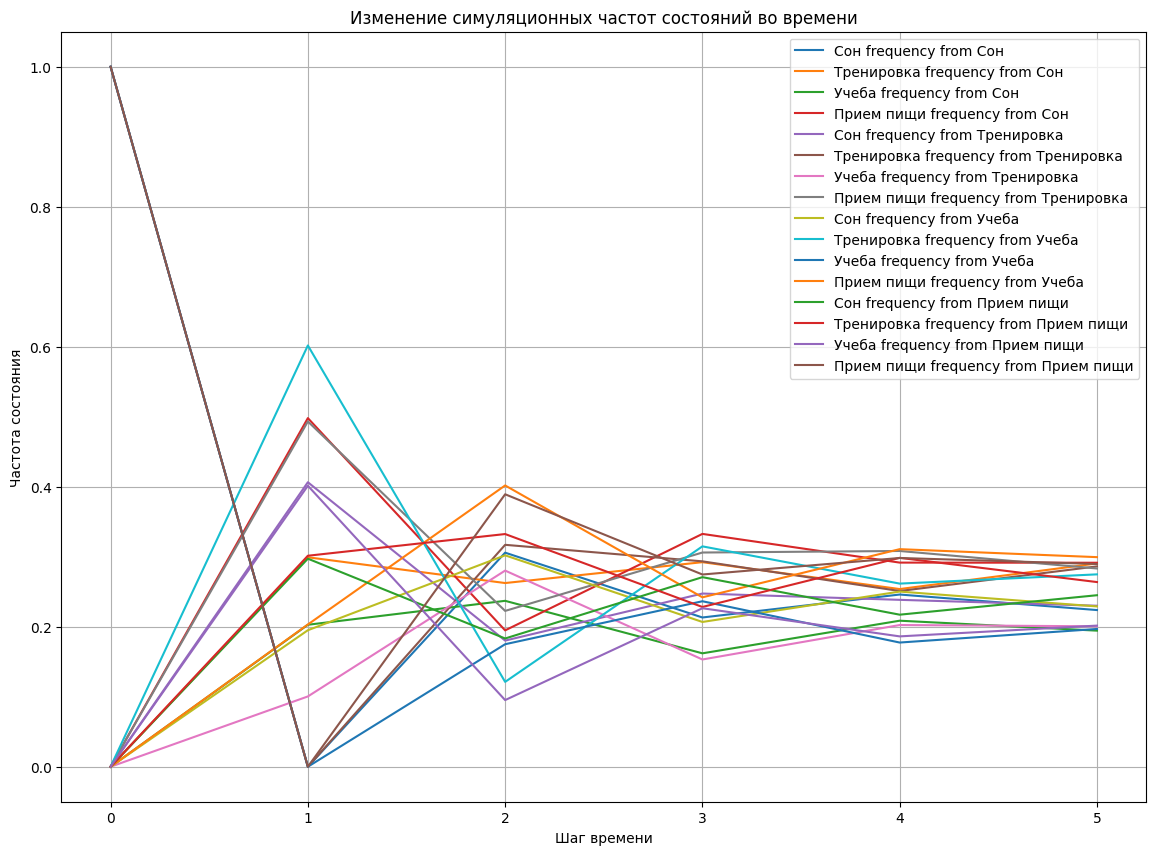

In [28]:
# Построение графиков
time_points = np.arange(6)
plt.figure(figsize=(14, 10))
for state, freqs in state_frequencies.items():
    for state_name, frequencies in freqs.items():
        plt.plot(time_points, frequencies, label=f'{state_name} frequency from {state}')

plt.title('Изменение симуляционных частот состояний во времени')
plt.xlabel('Шаг времени')
plt.ylabel('Частота состояния')
plt.legend()
plt.grid(True)
plt.show()
